# Forecasting Weather Recurrent Neural Networks

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading in and Preprocessing Data

In [2]:
temperature_data = pd.read_csv('temperature.csv.zip')
temperature_data.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5


In [3]:
temperature_data.isnull().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [4]:
temperature_data.drop(temperature_data.index[0], inplace=True)

In [5]:
temperature_data

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
5,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5
6,2012-10-01 18:00:00,284.620868,282.117710,289.417494,281.767681,291.846821,291.572917,293.359284,296.700424,285.472132,...,286.037673,288.564730,285.887208,287.368410,306.652574,304.150361,310.158846,304.4,304.4,303.5
7,2012-10-01 19:00:00,284.618824,282.126324,289.403119,281.760297,291.841480,291.582772,293.348320,296.723403,285.551525,...,286.131290,288.643994,285.900348,287.413990,306.406261,304.106534,310.074615,304.4,304.4,303.5
8,2012-10-01 20:00:00,284.616781,282.134939,289.388745,281.752912,291.836139,291.592626,293.337356,296.746381,285.630919,...,286.224906,288.723257,285.913487,287.459569,306.159948,304.062708,309.990385,304.4,304.4,303.5
9,2012-10-01 21:00:00,284.614738,282.143553,289.374370,281.745528,291.830798,291.602480,293.326392,296.769360,285.710312,...,286.318522,288.802521,285.926627,287.505149,305.913635,304.018881,309.906154,304.4,304.4,303.5
10,2012-10-01 22:00:00,284.612694,282.152168,289.359995,281.738144,291.825457,291.612334,293.315428,296.792339,285.789705,...,286.412139,288.881784,285.939767,287.550728,305.667322,303.975054,309.821923,304.4,304.4,303.5


## Dealing with Null Values in Dallas Data

In [6]:
temperature_data.isnull().sum()

datetime               0
Vancouver            794
Portland               0
San Francisco        792
Seattle                2
Los Angeles            2
San Diego              0
Las Vegas              0
Phoenix                2
Albuquerque            0
Denver                 0
San Antonio            0
Dallas                 3
Houston                2
Kansas City            0
Minneapolis           12
Saint Louis            0
Chicago                2
Nashville              1
Indianapolis           6
Atlanta                5
Detroit                0
Jacksonville           0
Charlotte              2
Miami                804
Pittsburgh             2
Toronto                0
Philadelphia           2
New York             792
Montreal               2
Boston                 2
Beersheba            797
Tel Aviv District    792
Eilat                792
Haifa                797
Nahariyya            796
Jerusalem            792
dtype: int64

In [7]:
temperature_data['Dallas'].isnull()[temperature_data['Dallas'].isnull() == True]

3859    True
3860    True
8205    True
Name: Dallas, dtype: bool

In [8]:
temperature_data['Dallas'].loc[3855:3865]

3855    290.83
3856    289.00
3857    288.70
3858    288.52
3859       NaN
3860       NaN
3861    286.76
3862    286.13
3863    285.48
3864    284.96
3865    284.00
Name: Dallas, dtype: float64

In [9]:
temperature_data.at[3859, 'Dallas'] = (288.52 + 286.76)/2
temperature_data.at[3860, 'Dallas'] = (288.52 + 286.76)/2

In [10]:
temperature_data.loc[3859, 'Dallas']

287.63999999999999

In [11]:
temperature_data['Dallas'].loc[8200:8210]

8200    302.150000
8201    300.990000
8202    300.451600
8203    299.188000
8204    298.546000
8205           NaN
8206    297.425667
8207    296.947333
8208    300.230000
8209    298.498000
8210    300.527000
Name: Dallas, dtype: float64

In [12]:
temperature_data.at[8205, 'Dallas'] = (298.546 + 297.425667)/2

In [13]:
temperature_data['Dallas'].isnull().sum()

0

In [14]:
temperature_data['datetime'] = pd.to_datetime(temperature_data['datetime'])

## Working with Dallas Temperature Data

In [15]:
temperature_data_dallas = temperature_data[['datetime', 'Dallas']]

In [16]:
temperature_data_dallas.head()

,datetime,Dallas
1,2012-10-01 13:00:00,289.740000
2,2012-10-01 14:00:00,289.762974
3,2012-10-01 15:00:00,289.830767
4,2012-10-01 16:00:00,289.898560
5,2012-10-01 17:00:00,289.966352


### Converting values from Celsius to Fahrenheit

In [17]:
def kelvin_to_farenheit(kelvin_temp):
    
    return (1.8*(kelvin_temp - 273) + 32)

In [18]:
temperature_data_dallas['Dallas'] = temperature_data_dallas['Dallas'].apply(kelvin_to_farenheit)
temperature_data_dallas['Dallas']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1        62.132000
2        62.173354
3        62.295381
4        62.417407
5        62.539434
6        62.661461
7        62.783488
8        62.905515
9        63.027542
10       63.149569
11       63.271596
12       63.393623
13       63.515650
14       63.637677
15       63.759704
16       63.881731
17       64.003758
18       64.125785
19       64.247811
20       64.369838
21       64.491865
22       64.613892
23       64.735919
24       64.857946
25       64.979973
26       65.102000
27       69.746000
28       72.536000
29       75.992000
30       79.952000
           ...    
45223    74.624000
45224    76.712000
45225    77.378000
45226    77.378000
45227    71.342600
45228    71.744000
45229    69.296000
45230    67.712000
45231    67.154000
45232    66.578000
45233    64.778000
45234    63.536000
45235    61.070000
45236    59.504000
45237    57.218000
45238    56.030000
45239    54.590000
45240    53.024000
45241    50.900000
45242    51.044000
45243    53.636000
45244    55.

In [19]:
temperature_data_dallas.head()

,datetime,Dallas
1,2012-10-01 13:00:00,62.132000
2,2012-10-01 14:00:00,62.173354
3,2012-10-01 15:00:00,62.295381
4,2012-10-01 16:00:00,62.417407
5,2012-10-01 17:00:00,62.539434


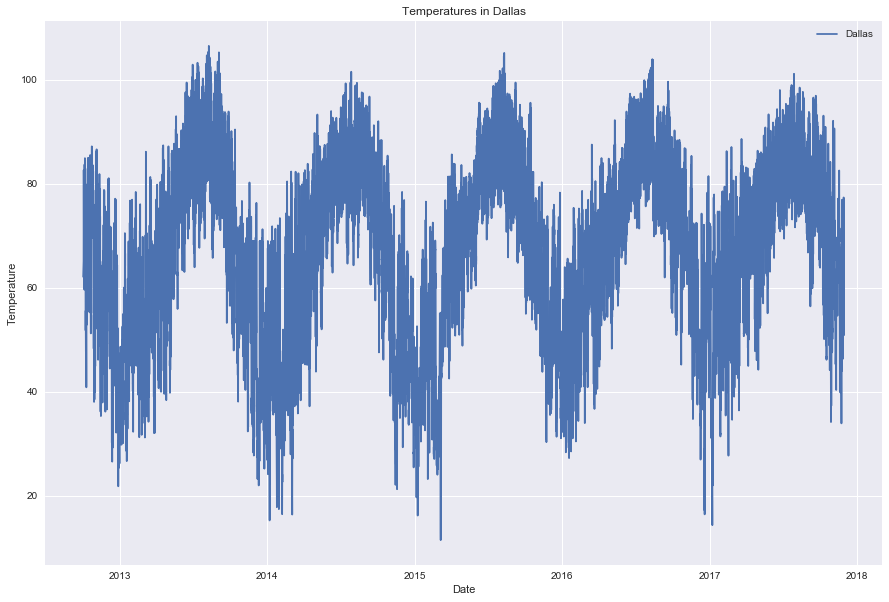

In [20]:
plt.plot(temperature_data_dallas['datetime'], temperature_data_dallas['Dallas'])
plt.legend()
plt.title('Temperatures in Dallas')
plt.xlabel('Date')
plt.ylabel('Temperature')
fig = plt.gcf()
fig.set_size_inches(15, 10)

## Training an RNNs using Tensorflow on the Dallas Data

In [21]:
import tensorflow as tf

### Short Term Model: Use 2 Weeks of Hourly Data to Predict Next Hour

In [22]:
hours_per_week = 24 * 7
train_data_dallas = temperature_data_dallas['Dallas'].iloc[:-2*hours_per_week] 
#everything up to last 2 weeks used for training data
test_data_dallas = temperature_data_dallas['Dallas'].tail(2*hours_per_week)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
train_data_dallas_scaled = scaler.fit_transform(train_data_dallas)
test_data_dallas_scaled = scaler.transform(test_data_dallas)

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

In [25]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    start = np.random.randint(0, len(training_data)-steps)
    
    # STEP 2: Now that we have a starting index we'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    y_batch = np.array(training_data[start:start + steps + 1]).reshape(1, steps+1)
    
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # We need to reshape these into tensors for the RNN to .reshape(-1,steps,1)
    return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [26]:
# Constants corresponding to hyperparameters for neural network

num_inputs = 1

num_time_steps = 2*hours_per_week

num_neurons = 100

num_outputs = 1

learning_rate = 0.001

num_epochs = 5000

batch_size = 1

In [27]:
X = tf.placeholder(tf.float32, shape=[None, num_time_steps,num_inputs])
y = tf.placeholder(tf.float32, shape=[None, num_time_steps,num_outputs])

In [28]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)  # An RNN cell with 100 neurons

In [29]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)  # This keeps track of outputs and states for us

In [30]:
loss = tf.reduce_mean(tf.square(outputs - y))  # MSE Loss Function
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) # Adam Optimizer that gradually slows learning rate
train = optimizer.minimize(loss) # the train operation minimizes the loss function

In [31]:
init = tf.global_variables_initializer()

In [32]:
saver = tf.train.Saver()

In [38]:
with tf.Session() as sess: # Took about 40 minutes to train model
    
    sess.run(init) # Initializes variables
    
    for epoch in range(num_epochs):
        
        X_batch, y_batch = next_batch(train_data_dallas_scaled, batch_size, num_time_steps) # Generates a random batch
        sess.run(train, feed_dict={X: X_batch, y: y_batch}) # Trains on the data from batch
        
        if epoch % 100 == 0: # Every 100 epochs 
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(epoch, "\tMSE:", mse)
        
    saver.save(sess, "./dallas_temp_model")

0 	MSE: 0.475297
100 	MSE: 0.0100629
200 	MSE: 0.00342179
300 	MSE: 0.00485651
400 	MSE: 0.0025736
500 	MSE: 0.00404038
600 	MSE: 0.0015069
700 	MSE: 0.00158315
800 	MSE: 0.00139951
900 	MSE: 0.00134681
1000 	MSE: 0.001297
1100 	MSE: 0.00097422
1200 	MSE: 0.000680492
1300 	MSE: 0.000454709
1400 	MSE: 0.000534626
1500 	MSE: 0.00119257
1600 	MSE: 0.000972839
1700 	MSE: 0.000475897
1800 	MSE: 0.000472278
1900 	MSE: 0.000854166
2000 	MSE: 0.000777147
2100 	MSE: 0.000430776
2200 	MSE: 0.000427779
2300 	MSE: 0.000458371
2400 	MSE: 0.000278886
2500 	MSE: 0.000468122
2600 	MSE: 0.000425749
2700 	MSE: 0.000304773
2800 	MSE: 0.000422953
2900 	MSE: 0.000369919
3000 	MSE: 0.000296993
3100 	MSE: 0.000316559
3200 	MSE: 0.00065249
3300 	MSE: 0.000317231
3400 	MSE: 0.000409723
3500 	MSE: 0.000445146
3600 	MSE: 0.000466768
3700 	MSE: 0.000374599
3800 	MSE: 0.000230203
3900 	MSE: 0.000233271
4000 	MSE: 0.00389124
4100 	MSE: 0.000280658
4200 	MSE: 0.000245686
4300 	MSE: 0.000249115
4400 	MSE: 0.00026424


## Generating Test Predictions

In [33]:
import pyprind

with tf.Session() as sess:
    
    saver.restore(sess, "./dallas_temp_model")
    
    train_seed = list(train_data_dallas_scaled[-2*hours_per_week:]) # Use the last four months of temp. data
    
    pbar = pyprind.ProgBar(2*hours_per_week)
    
    for iteration in range(2*hours_per_week):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])
        pbar.update()

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:12


In [34]:
results = scaler.inverse_transform(np.array(train_seed[2*hours_per_week:]).reshape(2*hours_per_week,1))

In [35]:
temperature_data_dallas['Dallas'].iloc[:-2*hours_per_week] 

1        62.132000
2        62.173354
3        62.295381
4        62.417407
5        62.539434
6        62.661461
7        62.783488
8        62.905515
9        63.027542
10       63.149569
11       63.271596
12       63.393623
13       63.515650
14       63.637677
15       63.759704
16       63.881731
17       64.003758
18       64.125785
19       64.247811
20       64.369838
21       64.491865
22       64.613892
23       64.735919
24       64.857946
25       64.979973
26       65.102000
27       69.746000
28       72.536000
29       75.992000
30       79.952000
           ...    
44887    74.984000
44888    76.784000
44889    77.144000
44890    76.370000
44891    75.362000
44892    73.778000
44893    72.770000
44894    71.870000
44895    71.636000
44896    71.258000
44897    70.430000
44898    69.584000
44899    69.116000
44900    69.091796
44901    69.062000
44902    68.144000
44903    67.820000
44904    67.712000
44905    67.424000
44906    67.370000
44907    67.910000
44908    67.

In [36]:
test_data_dallas_pred = pd.DataFrame({'datetime': test_data_dallas.index, 'Temperature': test_data_dallas})

In [37]:
test_data_dallas_pred['Predictions'] = results

In [38]:
test_data_dallas_pred.iloc[0:24]

,Temperature,datetime,Predictions
44917,67.928,44917,69.363564
44918,66.704,44918,68.057816
44919,65.984,44919,66.897652
44920,65.678,44920,65.914696
44921,65.516,44921,65.120888
44922,64.328,44922,64.442917
44923,64.184,44923,63.816479
44924,63.824,44924,63.216393
44925,63.212,44925,62.660633
44926,63.104,44926,62.189232


In [46]:
#test_data_dallas_pred['Temperature'] = test_data_dallas_pred['Temperature'].apply(kelvin_to_farenheit)
#test_data_dallas_pred['Predictions'] = test_data_dallas_pred['Predictions'].apply(kelvin_to_farenheit)

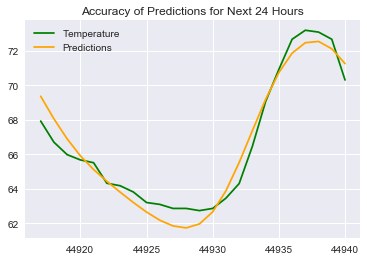

In [39]:
plt.plot(test_data_dallas_pred['datetime'].iloc[0:24], test_data_dallas_pred['Temperature'].iloc[0:24], color='green')
plt.plot(test_data_dallas_pred['datetime'].iloc[0:24], test_data_dallas_pred['Predictions'].iloc[0:24], color='orange')
plt.legend()
plt.title("Accuracy of Predictions for Next 24 Hours")

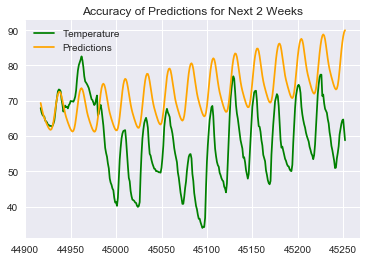

In [40]:
plt.plot(test_data_dallas_pred['datetime'], test_data_dallas_pred['Temperature'], color='green')
plt.plot(test_data_dallas_pred['datetime'], test_data_dallas_pred['Predictions'], color='orange')
plt.legend()
plt.title("Accuracy of Predictions for Next 2 Weeks")

## Testing 24 Hour Accuracy

In [66]:
def test_24_hour(data, input_size, scaler, test_size=24):
    
    with tf.Session() as sess:
        saver.restore(sess, "./dallas_temp_model")
    
        start = np.random.randint(0, len(data)-(input_size + test_size))
    
        end = start + input_size + test_size
    
        scaled_data = scaler.transform(data)
    
        predict_seed = list(scaled_data[start:start+input_size])
    
        pbar = pyprind.ProgBar(24)
    
        for iteration in range(24):
            X_batch = np.array(predict_seed[-input_size:]).reshape(1, input_size, 1)
            y_pred = sess.run(outputs, feed_dict={X: X_batch})
            predict_seed.append(y_pred[0, -1, 0])
            pbar.update()
    
    results = scaler.inverse_transform(np.array(predict_seed[input_size:]).reshape(24,1))
    prediction_data = pd.DataFrame({'index': data.iloc[start+input_size:end].index, 
                                    'Temperature': data.iloc[start+input_size:end]})
    prediction_data['Predictions'] = results
    
    plt.plot(prediction_data['index'], prediction_data['Temperature'], color='orange')
    plt.plot(prediction_data['index'], prediction_data['Predictions'], color='green')
    plt.legend()
    plt.title("Accuracy of predictions for next 24 hours")
    plt.show()
    
    return results
    

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


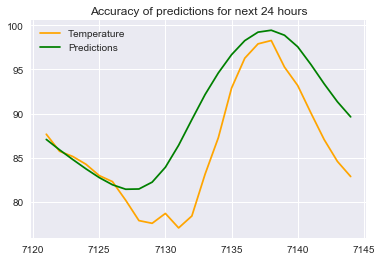

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


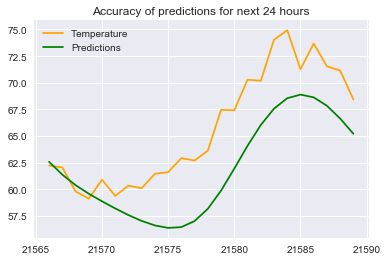

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


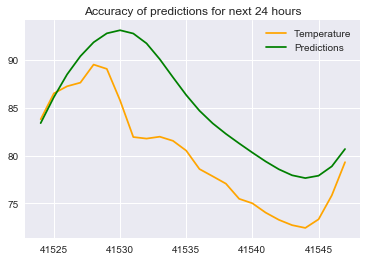

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


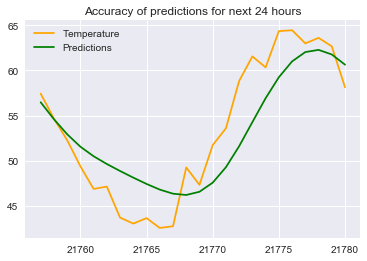

INFO:tensorflow:Restoring parameters from ./dallas_temp_model


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


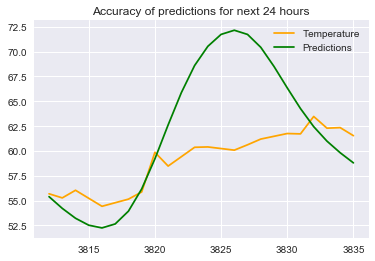

In [67]:
for i in range(5):
    test_24_hour(train_data_dallas, 2*hours_per_week, scaler)